In [2]:
# To load from colab
from google.colab import drive
drive.mount('/content/drive')




Mounted at /content/drive


In [3]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications import Xception
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import pandas as pd
from keras.callbacks import ReduceLROnPlateau

In [5]:
datagen = ImageDataGenerator( rescale = 1.0/255,
                                          width_shift_range=0.1,
                                          height_shift_range=0.1,
                                          zoom_range=0.2,
                                          vertical_flip=True,
                                          horizontal_flip=True,
                                          fill_mode='nearest')

#Load data
train_generator = datagen.flow_from_directory(
    '/content/drive/My Drive/Assgn-2/CV_Assignment3/intel-image-classification/seg_train/seg_train/',
    target_size=(150, 150),
    shuffle=True,
    batch_size=32,
    class_mode="categorical")

validation_generator = datagen.flow_from_directory(
    '/content/drive/My Drive/Assgn-2/CV_Assignment3/intel-image-classification/seg_train/seg_train/',
    target_size=(150, 150),
    batch_size=128,
    shuffle=True,
    class_mode="categorical")

test_generator = datagen.flow_from_directory(
    '/content/drive/My Drive/Assgn-2/CV_Assignment3/intel-image-classification/seg_test/seg_test/',
    target_size=(150, 150),
    shuffle=True,
    batch_size=128,
    class_mode="categorical",
)

Found 14034 images belonging to 6 classes.
Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [6]:
#load the pretrained model
from keras.applications.inception_v3 import InceptionV3
inceptionV3 = InceptionV3(include_top= False, input_shape=(150,150,3))

for layer in inceptionV3.layers:
	layer.trainable = False

last_layer = inceptionV3.get_layer('mixed9')

print('last layer output shape: ', last_layer.output_shape)

last_output = last_layer.output

87916544/87910968 [==============================] - 1s 0us/step
last layer output shape:  (None, 3, 3, 2048)


In [7]:
LearningRateScheduler = ReduceLROnPlateau(monitor='val_acc',
                                            patience=1,
                                            verbose=1,
                                            factor=0.20,
                                            min_lr=0.000001)

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense(6, activation='softmax')(x)           

model = Model(inceptionV3.input, x) 

model.compile(optimizer = tf.keras.optimizers.Adam(), 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [8]:
history = model.fit(train_generator,
                    epochs = 10,
                    verbose = 1,
                   validation_data = validation_generator,
                   callbacks=[LearningRateScheduler])



Epoch 1/10
439/439 [==============================] - 3436s 8s/step - loss: 0.6832 - acc: 0.7915 - val_loss: 0.3101 - val_acc: 0.8873
Epoch 2/10
439/439 [==============================] - 187s 427ms/step - loss: 0.3216 - acc: 0.8827 - val_loss: 0.2798 - val_acc: 0.8987
Epoch 3/10
439/439 [==============================] - 187s 426ms/step - loss: 0.3278 - acc: 0.8806 - val_loss: 0.2705 - val_acc: 0.8968

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Epoch 4/10
439/439 [==============================] - 187s 427ms/step - loss: 0.2561 - acc: 0.9051 - val_loss: 0.2222 - val_acc: 0.9164
Epoch 5/10
439/439 [==============================] - 186s 425ms/step - loss: 0.2289 - acc: 0.9122 - val_loss: 0.2065 - val_acc: 0.9235
Epoch 6/10
439/439 [==============================] - 188s 428ms/step - loss: 0.2176 - acc: 0.9208 - val_loss: 0.1965 - val_acc: 0.9265
Epoch 7/10
439/439 [==============================] - 187s 427ms/step - loss: 0.2150 - acc: 0.9180 - val

In [26]:
# Predictions on test dataset

model.save_weights('/content/drive/My Drive/Assgn-2/CV_Assignment3')
test_generator.reset()
pred=model.predict_generator(test_generator,
verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


24/24 [==============================] - 951s 41s/step


In [ ]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, accuracy_score
ypred=predicted_class_indices
ytest=test_generator.labels
confusion_mat=tf.math.confusion_matrix(
    ytest,ypred,num_classes=None, weights=None, dtype=tf.dtypes.int32,
    name=None
)

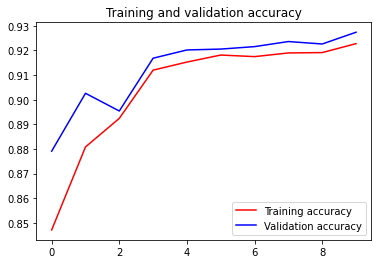

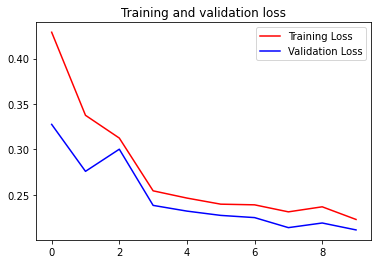

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Prediction for this image is : sea


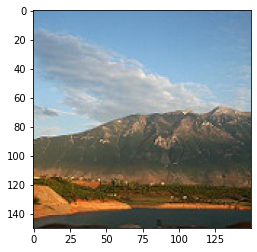

In [25]:
import numpy as np
from keras.preprocessing import image

file_path =  '/content/drive/My Drive/Assgn-2/CV_Assignment3/intel-image-classification/seg_pred/seg_pred/84.jpg'

test_image = image.load_img(file_path, target_size = (150, 150))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

classes=train_generator.class_indices

classes=['buildings','forest','glacier','mountain','sea','street']

print("Prediction for this image is :",classes[np.argmax(result)])

In [87]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, accuracy_score
ypred=predicted_class_indices
ytest=test_generator.labels
confusion_mat=tf.math.confusion_matrix(
    ytest,ypred,num_classes=None, weights=None, dtype=tf.dtypes.int32,
    name=None
)
print('F1 Score =', f1_score(ytest, ypred,average='micro'))
print('Accuracy =', accuracy_score(ytest, ypred))
FP = confusion_mat[0][1]
TP = confusion_mat[1][1]
print('True Positive =', TP)
print('False Positive =', FP)

F1 Score = 0.17333333333333334
Accuracy = 0.17333333333333334
True Positive = tf.Tensor(71, shape=(), dtype=int32)
False Positive = tf.Tensor(75, shape=(), dtype=int32)
